In [11]:
%pip install seaborn
%pip install folium
%pip install requests pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
%matplotlib inline

In [27]:
# from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
resp = requests.get(URL)
if resp.status_code == 200:
    df = pd.read_csv(URL)
    # df = pd.read_csv(pd.compat.StringIO(data))
    
print('Data read into a pandas dataframe!')
df.head(5)

Data read into a pandas dataframe!


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [31]:
import datetime as dt
print("columns",df.columns)
print("types",df.dtypes)

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

columns Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')
types Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object


In [33]:
print("types",df.dtypes)

types Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object


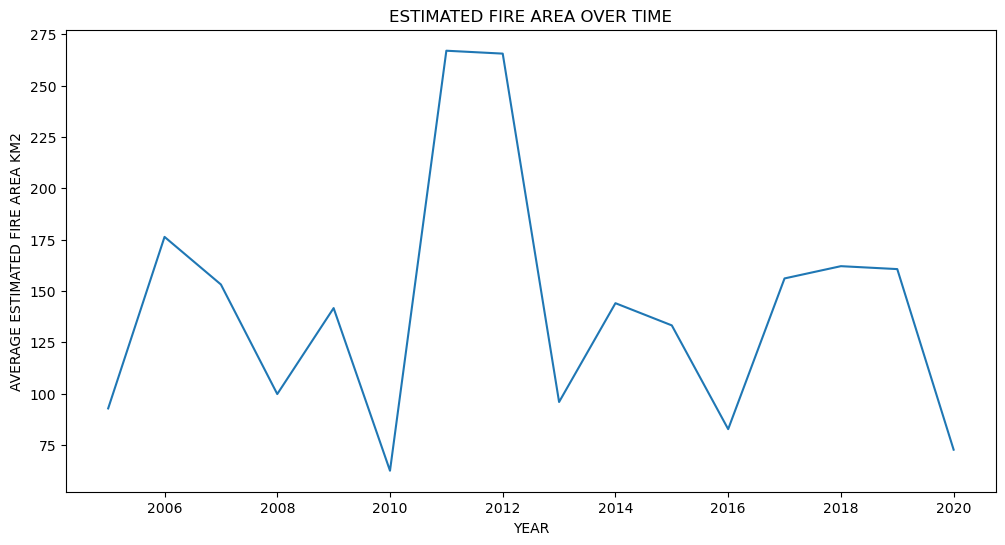

In [43]:
plt.figure(figsize=(12,6))
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('YEAR')
plt.ylabel('AVERAGE ESTIMATED FIRE AREA KM2')
plt.title('ESTIMATED FIRE AREA OVER TIME')
plt.show()

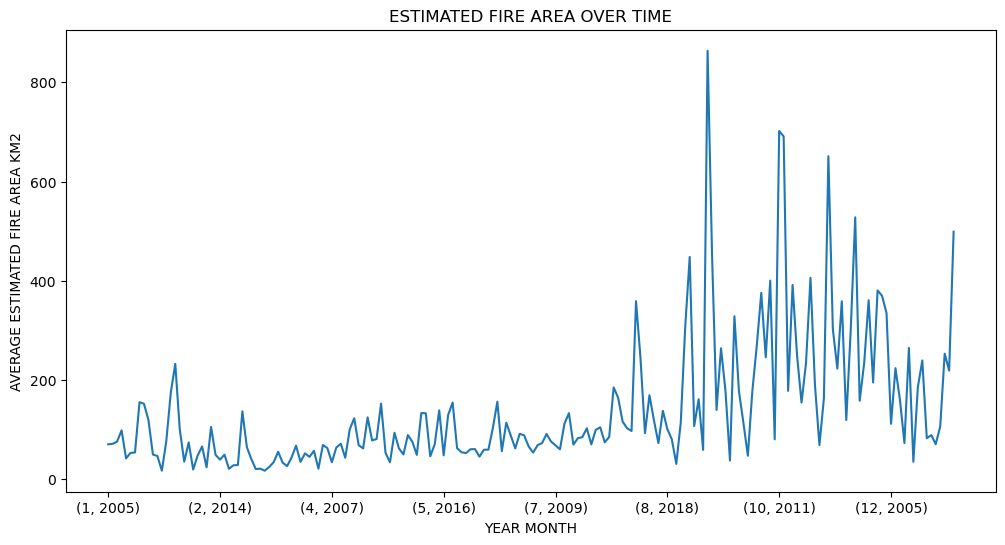

In [47]:
plt.figure(figsize=(12,6))
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('YEAR MONTH')
plt.ylabel('AVERAGE ESTIMATED FIRE AREA KM2')
plt.title('ESTIMATED FIRE AREA OVER TIME')
plt.show()

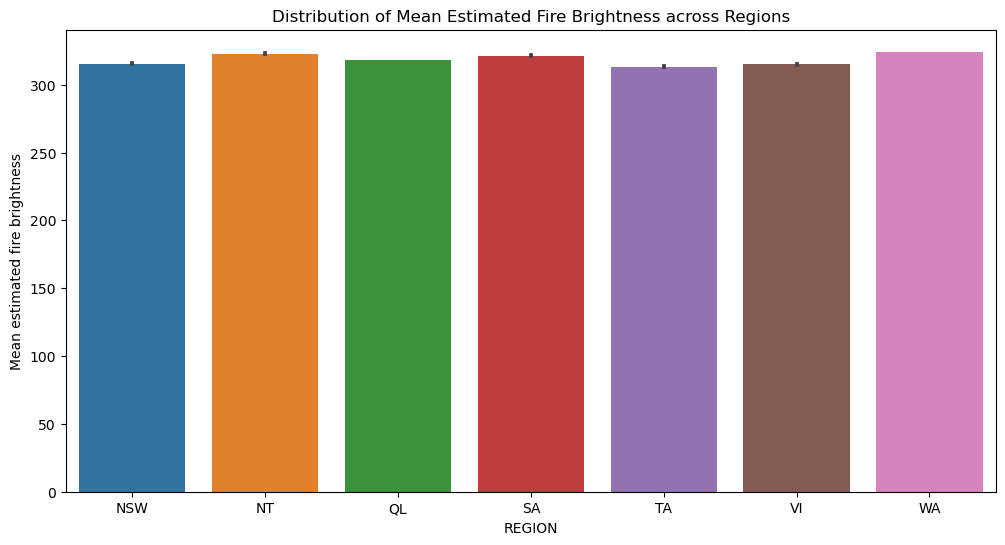

In [53]:
df['Region'].unique()

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('REGION')
plt.ylabel('Mean estimated fire brightness')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

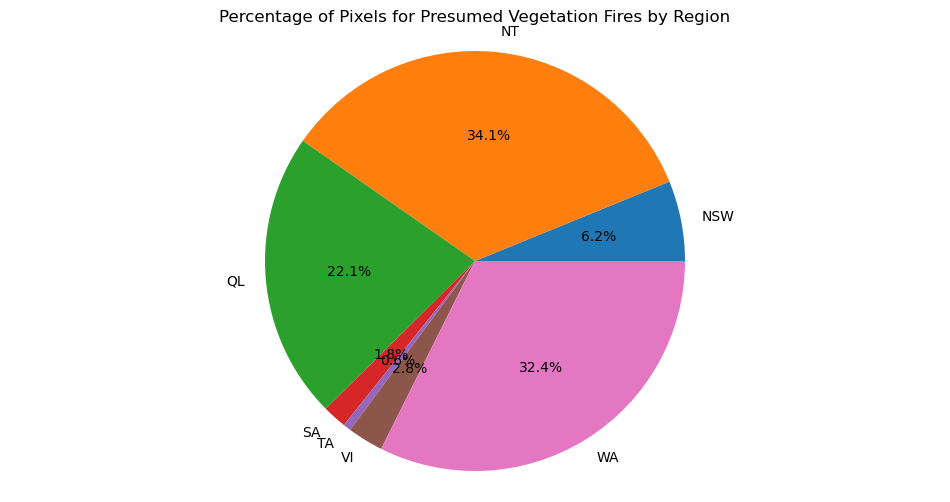

In [67]:
plt.figure(figsize=(12,6))
region_counts = df.groupby('Region')['Count'].sum()
[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

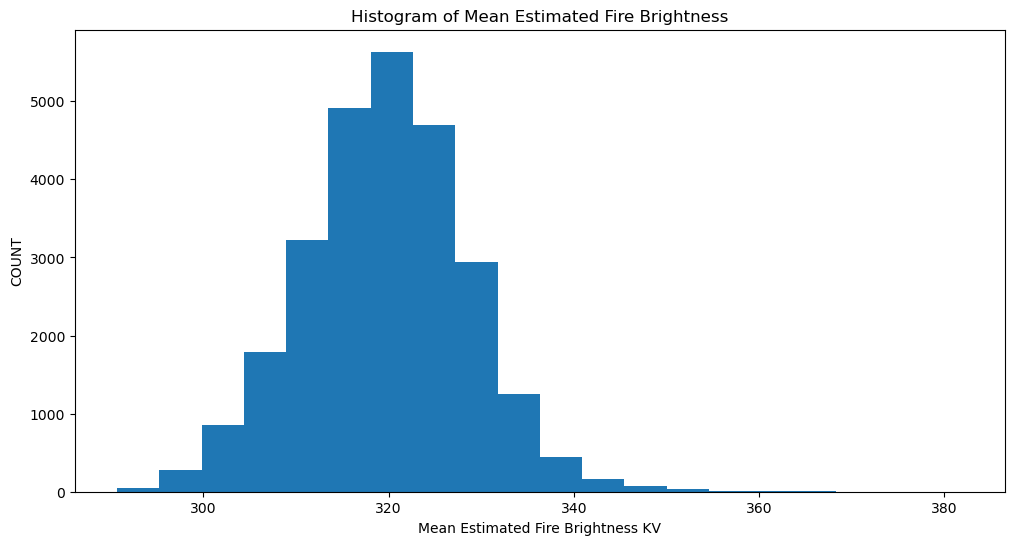

In [71]:
plt.figure(figsize=(12,6))
plt.hist(x=df['Mean_estimated_fire_brightness'],bins=20)
plt.xlabel('Mean Estimated Fire Brightness KV')
plt.ylabel('COUNT')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()


C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


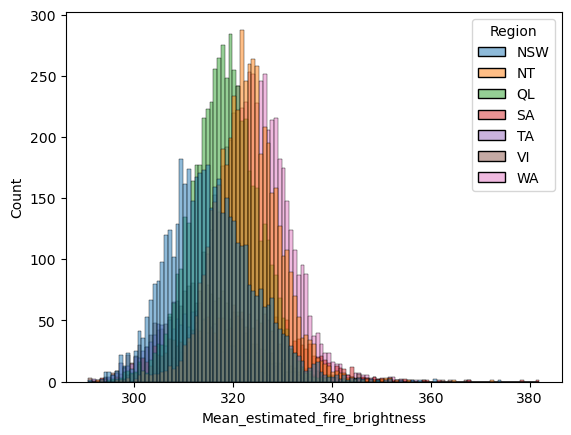

In [75]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


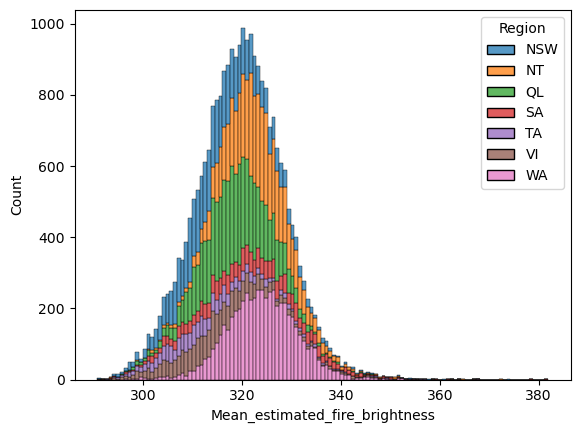

In [77]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

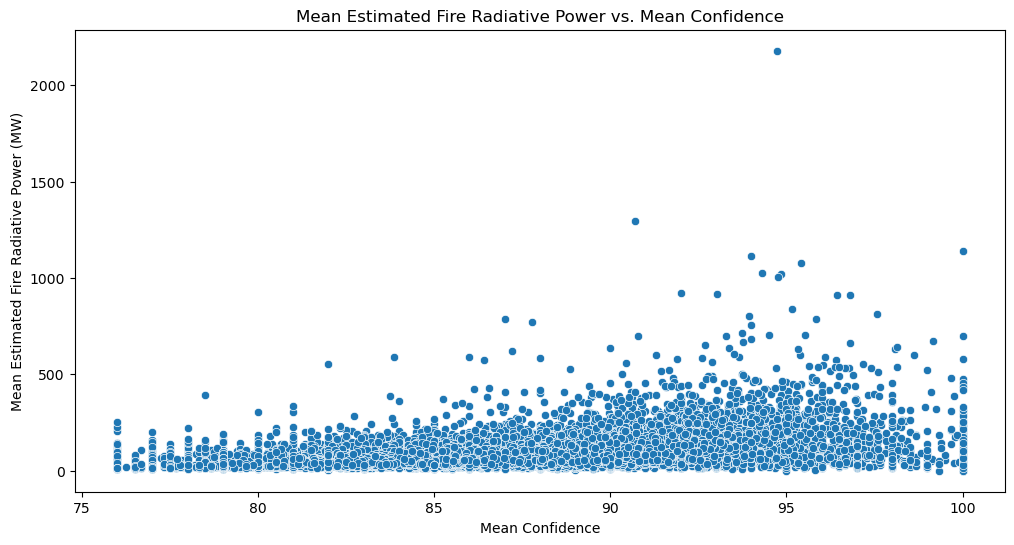

In [83]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Mean_confidence',y='Mean_estimated_fire_radiative_power')
plt.ylabel('Mean Estimated Fire Radiative Power (MW)')
plt.xlabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

In [87]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)